In [ ]:
!pip install protobuf==3.20.3

In [ ]:
!pip install mediapipe

  Using cached protobuf-4.25.5-cp37-abi3-manylinux2014_x86_64.whl.metadata (541 bytes)
Using cached protobuf-4.25.5-cp37-abi3-manylinux2014_x86_64.whl (294 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.15.0 requires protobuf<4.21,>=3.20.3; python_version < "3.11", but you have protobuf 4.25.5 which is incompatible.


## mediapipe
- 랜드마크 좌표로 이마 , 양 볼 추출

In [ ]:
import cv2
import mediapipe as mp
import numpy as np
from google.colab.patches import cv2_imshow  # Colab에서 이미지 표시를 위한 모듈

# MediaPipe Face Mesh 초기화
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=1, min_detection_confidence=0.5)

def draw_landmarks(image, landmarks, connections):
    # 이미지에 랜드마크 그리기
    for landmark in landmarks.landmark:
        x = int(landmark.x * image.shape[1])
        y = int(landmark.y * image.shape[0])
        cv2.circle(image, (x, y), 1, (0, 255, 0), -1)

    # 랜드마크 간의 연결 그리기
    for connection in connections:
        start_idx, end_idx = connection
        start_landmark = landmarks.landmark[start_idx]
        end_landmark = landmarks.landmark[end_idx]
        x_start = int(start_landmark.x * image.shape[1])
        y_start = int(start_landmark.y * image.shape[0])
        x_end = int(end_landmark.x * image.shape[1])
        y_end = int(end_landmark.y * image.shape[0])
        cv2.line(image, (x_start, y_start), (x_end, y_end), (0, 255, 0), 1)

def extract_face_parts(image_path):
    # 이미지 읽기
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # 얼굴 랜드마크 탐지
    results = face_mesh.process(image_rgb)

    if results.multi_face_landmarks:
        landmarks = results.multi_face_landmarks[0]

        # 랜드마크 그리기
        draw_landmarks(image, landmarks, mp_face_mesh.FACEMESH_TESSELATION)

        # 결과 이미지를 저장하거나 Colab에서 표시
        cv2_imshow(image)

        print("얼굴 랜드마크가 그려졌습니다.")
    else:
        print("얼굴을 찾을 수 없습니다.")

# 이미지 경로를 지정하여 함수 실행
extract_face_parts("/content/drive/MyDrive/대구은행/자유주제_피부_프로젝트/0003_01_F.jpg")


# # 이미지 저장
# output_image_path = 'output_face1.png'
# cv2.imwrite(output_image_path, image)

# # 이미지 출력
# display(Image(filename=output_image_path))


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import cv2
import mediapipe as mp
from IPython.display import Image, display
from google.colab.patches import cv2_imshow

# MediaPipe FaceMesh 초기화
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh()

# OpenCV 이미지 불러오기
image_path = '/content/drive/MyDrive/대구은행/자유주제_피부_프로젝트/0003_01_F.jpg'  # 얼굴 이미지 파일 경로 설정
image = cv2.imread(image_path)
image = cv2.resize(image, None, fx=2, fy=2, interpolation=cv2.INTER_LINEAR)  # 이미지를 2배로 확대
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 얼굴 특성 추출
results = face_mesh.process(image_rgb)

# 랜드마크 그리기 및 번호 표시
if results.multi_face_landmarks:
    for face_landmarks in results.multi_face_landmarks:
        for idx, landmark in enumerate(face_landmarks.landmark):
            x = int(landmark.x * image.shape[1])
            y = int(landmark.y * image.shape[0])
            cv2.circle(image, (x, y), 2, (0, 255, 0), -1)  # 랜드마크를 초록색 점으로 표시
            cv2.putText(image, str(idx), (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 1)  # 랜드마크 번호 크기 축소

# 이미지 저장
output_image_path = 'output_face.png'
cv2.imwrite(output_image_path, image)

# 이미지 출력
display(Image(filename=output_image_path))


Output hidden; open in https://colab.research.google.com to view.

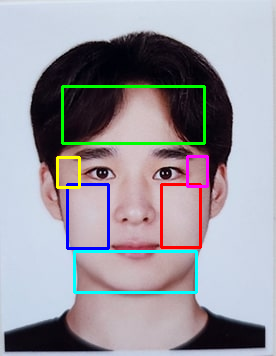

이마, 양 볼, 턱, 그리고 양 눈가의 이미지가 추출되고 저장되었습니다.


In [ ]:
import cv2
import mediapipe as mp
from google.colab.patches import cv2_imshow

# MediaPipe Face Mesh 초기화
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=1, min_detection_confidence=0.5)

def extract_face_parts(image_path):
    # 이미지 읽기
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # 얼굴 랜드마크 탐지
    results = face_mesh.process(image_rgb)

    if results.multi_face_landmarks:
        landmarks = results.multi_face_landmarks[0].landmark

        # 이미지 크기 가져오기
        h, w, _ = image.shape

        # 이마 영역 추출
        forehead_top = max(0, int(landmarks[10].y * h) - 30)
        forehead_bottom = min(h, int(landmarks[68].y * h))
        forehead_left = max(0, int(landmarks[21].x * w))
        forehead_right = min(w, int(landmarks[251].x * w))
        forehead = image[forehead_top:forehead_bottom, forehead_left:forehead_right]

        # 왼쪽 볼 좌표 설정
        left_cheek_left = int(landmarks[58].x * w)  # 왼쪽 귓볼
        left_cheek_right = int(landmarks[203].x * w)  # 왼쪽 콧볼
        left_cheek_top = int(landmarks[228].y * h)  # 왼쪽 눈 밑
        left_cheek_bottom = int(landmarks[214].y * h)  # 왼쪽 입꼬리 끝
        left_cheek = image[left_cheek_top:left_cheek_bottom, left_cheek_left:left_cheek_right]

        # 오른쪽 볼 좌표 설정
        right_cheek_left = int(landmarks[423].x * w)  # 오른쪽 콧볼
        right_cheek_right = int(landmarks[376].x * w)  # 오른쪽 귓볼
        right_cheek_top = int(landmarks[448].y * h)  # 오른쪽 눈 밑
        right_cheek_bottom = int(landmarks[434].y * h)  # 오른쪽 입꼬리 끝
        right_cheek = image[right_cheek_top:right_cheek_bottom, right_cheek_left:right_cheek_right]

        # 턱 좌표 설정
        chin_top = int(landmarks[15].y * h)  # 턱 상단
        chin_bottom = int(landmarks[152].y * h)  # 턱 하단
        chin_left = int(landmarks[138].x * w)  # 턱 좌측
        chin_right = int(landmarks[367].x * w)  # 턱 우측
        chin = image[chin_top:chin_bottom, chin_left:chin_right]

        # 왼쪽 눈가 좌표 설정
        left_eye_top = int(landmarks[70].y * h)  # 왼쪽 눈가 상단
        left_eye_bottom = int(landmarks[111].y * h)  # 왼쪽 눈가 하단
        left_eye_left = int(landmarks[127].x * w)  # 왼쪽 눈가 좌측
        left_eye_right = int(landmarks[226].x * w)  # 왼쪽 눈가 우측
        left_eye = image[left_eye_top:left_eye_bottom, left_eye_left:left_eye_right]

        # 오른쪽 눈가 좌표 설정
        right_eye_top = int(landmarks[300].y * h)  # 오른쪽 눈가 상단
        right_eye_bottom = int(landmarks[340].y * h)  # 오른쪽 눈가 하단
        right_eye_left = int(landmarks[342].x * w)  # 오른쪽 눈가 좌측
        right_eye_right = int(landmarks[264].x * w)  # 오른쪽 눈가 우측
        right_eye = image[right_eye_top:right_eye_bottom, right_eye_left:right_eye_right]

        # 이미지가 비어있지 않으면 각각 저장
        if forehead.size > 0:
            cv2.imwrite("forehead.jpg", forehead)
        if left_cheek.size > 0:
            cv2.imwrite("left_cheek.jpg", left_cheek)
        if right_cheek.size > 0:
            cv2.imwrite("right_cheek.jpg", right_cheek)
        if chin.size > 0:
            cv2.imwrite("chin.jpg", chin)
        if left_eye.size > 0:
            cv2.imwrite("left_eye.jpg", left_eye)
        if right_eye.size > 0:
            cv2.imwrite("right_eye.jpg", right_eye)

        # 각 부위에 사각형 그리기
        cv2.rectangle(image, (forehead_left, forehead_top), (forehead_right, forehead_bottom), (0, 255, 0), 2)  # 이마
        cv2.rectangle(image, (left_cheek_left, left_cheek_top), (left_cheek_right, left_cheek_bottom), (255, 0, 0), 2)  # 왼쪽 볼
        cv2.rectangle(image, (right_cheek_left, right_cheek_top), (right_cheek_right, right_cheek_bottom), (0, 0, 255), 2)  # 오른쪽 볼
        cv2.rectangle(image, (chin_left, chin_top), (chin_right, chin_bottom), (255, 255, 0), 2)  # 턱
        cv2.rectangle(image, (left_eye_left, left_eye_top), (left_eye_right, left_eye_bottom), (0, 255, 255), 2)  # 왼쪽 눈가
        cv2.rectangle(image, (right_eye_left, right_eye_top), (right_eye_right, right_eye_bottom), (255, 0, 255), 2)  # 오른쪽 눈가

        # 결과 이미지 Colab에 표시
        cv2_imshow(image)

        print("이마, 양 볼, 턱, 그리고 양 눈가의 이미지가 추출되고 저장되었습니다.")
    else:
        print("얼굴을 찾을 수 없습니다.")

# 이미지 경로를 지정하여 함수 실행
extract_face_parts("/content/drive/MyDrive/대구은행/자유주제_피부_프로젝트/증명사진.jpg")



# 턱 , 관자 버리기
